In [4]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd

%matplotlib inline

# Задача

Нам потрібно оцінити шанс вступу для абітурієнта на основі його балів за два іспита. Для цього ми маємо датасет, в якому кожен рядок це окермий студент, відповідно ознака `X` це бали за іспити, а залежна (прогнозована) змінна `y` це чи вступив чи не вступив. 

# Завантажимо дані й подивимось на них

- `x_train` - це оцінки студентів за 2 ексзамени <br>
- `y_train` - це рішення комісії по вступу
    - `y_train = 1` значить що студент прийнятий на навчання 
    - `y_train = 0` значить що студенту відмовили

In [5]:
# load dataset

data =  pd.read_csv('ex2data1.txt', sep=",", header=None, names = ['score_1', 'score_2', 'decision'])
X_train = np.array(data[['score_1', 'score_2']])
y_train = np.array(data['decision'])

In [6]:
print("Пеші 5 елементів X_train:\n", X_train[:5])
print("Пеші 5 елементів y_train are:\n", y_train[:5])

Пеші 5 елементів X_train:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Пеші 5 елементів y_train are:
 [0 0 0 1 1]


In [7]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)


### Візуалізуємо дані

Так як в нас тривимірні дані, і один з вимірів бінарний (0/1) то їх можна візуалізувати, де категорія буде кольором точки та подивитися як вони розміщені. 

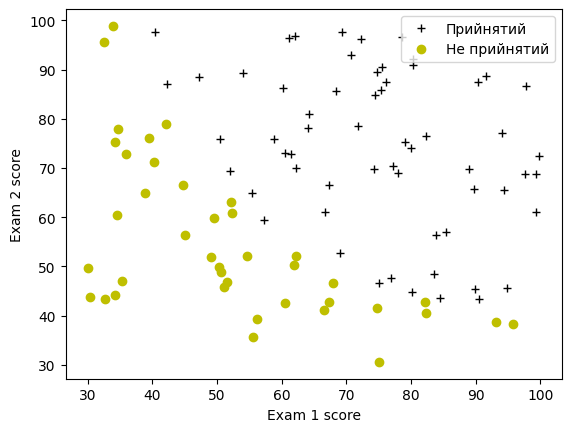

In [8]:
# Plot examples
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'k+', label="Прийнятий")
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'yo', label="Не прийнятий")

# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()

Виглядає, що ці дані можуть бути розділені лінією. Тому логістична регресія мала б впоратися з завданням.

## Logistic regression

У цьому ноутбуці ви побудуєте та натренуєте логістичну регресію, знайшовший найкращі параметри $(w,b)$ для ваших даних.
- Функція логістичної регресії яка переводить `x` (оцінки за іспит) в `y` (рішення про вступ)
    $$f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$
    

- Для побудови алгоритму логістичної регресії вам потрібно найти найкращі параметри $(w,b)$, а для цього потрібно:

    - Реалізувати функцію sigmoid для того щоб ваші передбачення перетворювалися в ймовірність (були в межах від 0 до 1)
        $$g(z) = \frac{1}{1+e^{-z}}$$

    - Реалізувати порівняння, як одні параметри $(w,b)$ кращі чи гірші по відношенню до інших. Для цього потрібна функція втрат $J(w,b)$
  
        - Найкращі $(w,b)$ - це ті які дають вам найменше значння $J(w,b)$.
    
    - Рeалізувати  **gradient descent** для пошуку найменшого $J(w,b). 
    
        - Кожен крок градієнтного спуску ваші параметри $(w,b)$ мають наближатися до мінімального значення $J(w,b)$.
  

- Також потрібно реалізувати передбачення, щоб ви могли передати моделі значення $x$ і вона повернула вам $f_{w,b}(x)$ (прогнозований прибуток.

# Задача 1 - сигмоїда

Допишіть функцію `sigmoid` для обчислення формули:

$$g(z) = \frac{1}{1+e^{-z}}$$

Зауваження 
- `z` - це не завжди число, це може бути масив. 
- якщо на вхід подається масив то результатом має бути маси де для кожного елемента порахована сигмоїда.

In [12]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
     
    g = 0
    try:
        array = []
        for i in range(len(z)):
            array.append(1/(1+math.exp(-z[i])))
        g = np.array(array)
    except:
        g = 1/(1+math.exp(-z))
    
    
    # ВАШ КОД ТУТ

    return g

In [13]:
print ("sigmoid(0) = " + str(sigmoid(0)))

sigmoid(0) = 0.5


**Очікуваний результат**:
<table>
  <tr>
    <td> <b>sigmoid(0)<b></td>
    <td> 0.5 </td> 
  </tr>
</table>

In [14]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


**Очікуваний результат**:
<table>
  <tr>
    <td><b>sigmoid([-1, 0, 1, 2])<b></td> 
    <td>[0.26894142        0.5           0.73105858        0.88079708]</td> 
  </tr>    
  
</table>

# Задача 2 - функція втрат

### Exercise 2



З лекції ви памятаєте, що функція втрат для логістичної регресії $J(w,b)$ задаєтсья наступною формулою

$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

де
* m це кількість записів в даних


* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ це функція втрат для одного окремого запису в даних - 

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ це передбачення моделі, а $y^{(i)}$ - реальне значення

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x^{(i)}} + b)$ де $g$ це сигмоїда.
    * Зручно спочатку обчислити значення $z_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b = w_0x^{(i)}_0 + ... + w_{n-1}x^{(i)}_{n-1} + b$ де $n$ це кілкьість різних ознак, а потім $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

Note:
* Памятайте що  `X_train` та `y_train` це матриці розміром ($m, n$) і ($𝑚$,1), де  $𝑛$ це кількість ознак, а $𝑚$ це кілкьість записів в даних.


In [54]:
def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """
    total_cost = 0
    u = []
    for i in range(len(X)):
        u.append(0)
        for j in range(len(w)):
          u[i] += (w[j]* X[i][j])
        u[i] += b
    u = np.array(u)
    A = sigmoid(u)

    loss = []
    for i in range(len(u)):
       loss.append((-y[i]*math.log(A[i])-(1-y[i])*math.log(1-A[i])))
    # ВАШ КОД ТУТ
    loss = np.array(loss)
    total_cost = 1/len(X) * np.sum(loss)
    
    return total_cost

In [55]:
m, n = X_train.shape

# Compute and display cost with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


**Очікуваний результат**:
<table>
  <tr>
    <td> <b>Cost at initial w (zeros)<b></td>
    <td> 0.693 </td> 
  </tr>
</table>

In [56]:
# Compute and display cost with non-zero w
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))

Cost at test w,b: 0.218


**Очікуваний результат**:
<table>
  <tr>
    <td> <b>Cost at test w,b<b></td>
    <td> 0.218 </td> 
  </tr>
</table>

# Задача 3 - обчислення та оновлення градієнтів

Алгоритм градієнтного спуску виглядає наступним чином

$$\begin{align*}& \text{доки не досягнули мінімуму:}  \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$

параметри $w, b$ обоє мають оновлювати одночасно за такими градієнтами
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$
* m кількість даних

    
*  $f_{w,b}(x^{(i)})$ передбачення моделі, а $y^{(i)}$ реальне значення

In [71]:
def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    dj_dw = []
    dj_db = 0
    
    
    u = []
    for i in range(len(X)):
        u.append(0)
        for j in range(len(w)):
          u[i] += (w[j]* X[i][j])
        u[i] += b
    u = np.array(u)
    A = sigmoid(u)

    for i in range(len(y)):
       dj_db += A[i] - y[i]
    dj_db = 1/len(y) * dj_db


    for i in range(len(w)):
      wtemp = 0
      for j in range(len(y)):
        wtemp += (A[j] - y[j])*X[j][i]
      wtemp = 1/len(y) * wtemp
      dj_dw.append(wtemp)

    dj_dw = np.array(dj_dw)
    # ВАШ КОД ТУТ
        
    return dj_db, dj_dw

In [72]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


**Очікуваний результат**:
<table>
  <tr>
    <td> <b>dj_db at initial w (zeros)<b></td>
    <td> -0.1 </td> 
  </tr>
  <tr>
    <td> <b>ddj_dw at initial w (zeros):<b></td>
    <td> [-12.00921658929115, -11.262842205513591] </td> 
  </tr>
</table>

In [73]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [-44.831353617873795, -44.37384124953979]


**Очікуваний результат**:
<table>
  <tr>
    <td> <b>dj_db at test_w<b></td>
    <td> -0.5999999999991071 </td> 
  </tr>
  <tr>
    <td> <b>dj_dw at test_w:<b></td>
    <td>  [-44.8313536178737957, -44.37384124953978] </td> 
  </tr>
</table>

# Задача 4 - градієнтний спуск

Тепер вам треба реалізувати весь алгоритм градієнтного спуску. Ваші задачі наступні:
- Ви маєте зробити цикл і для кожної ітераці:
    - обчислювати градієнт;
    - оновлювати параметри;
    - обчислювати та зберігати функцію втрат;
    - Друкувати кожні (num_iters/10) ітерацій номер ітерації та поточне значеня функції втрат 

- Для валідації що ваш алгоритм працюю добре, функція втрат має падати з кожним кроком.

In [78]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """

    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    
    for i in range(num_iters):
      db_dj, dj_dw = gradient_function(X, y, w_in, b_in)
      w_in = w_in - alpha*dj_dw
      b_in = b_in - alpha*db_dj
      J_history.append(cost_function(X, y, w_in, b_in))
        # ВАШ КОД ТУТ
    for i in range(num_iters):
       if i%10 == 0:
          print(i, round(J_history[i], 2))

    return w_in, b_in, J_history 

In [79]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1, 1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w, b, J_history = gradient_descent(X_train, y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha, iterations, 0)

0 1.01
10 0.31
20 0.31
30 0.31
40 0.31
50 0.31
60 0.31
70 0.31
80 0.31
90 0.31
100 0.31
110 0.31
120 0.31
130 0.31
140 0.31
150 0.31
160 0.31
170 0.31
180 0.31
190 0.31
200 0.31
210 0.31
220 0.31
230 0.31
240 0.31
250 0.31
260 0.31
270 0.31
280 0.31
290 0.31
300 0.31
310 0.31
320 0.31
330 0.31
340 0.31
350 0.31
360 0.31
370 0.31
380 0.31
390 0.31
400 0.31
410 0.31
420 0.31
430 0.31
440 0.31
450 0.31
460 0.31
470 0.31
480 0.31
490 0.31
500 0.31
510 0.31
520 0.31
530 0.31
540 0.31
550 0.31
560 0.31
570 0.31
580 0.31
590 0.31
600 0.31
610 0.31
620 0.31
630 0.31
640 0.31
650 0.31
660 0.31
670 0.31
680 0.31
690 0.31
700 0.31
710 0.31
720 0.31
730 0.31
740 0.31
750 0.31
760 0.31
770 0.31
780 0.31
790 0.31
800 0.31
810 0.31
820 0.31
830 0.31
840 0.31
850 0.31
860 0.31
870 0.31
880 0.31
890 0.31
900 0.31
910 0.31
920 0.31
930 0.31
940 0.31
950 0.31
960 0.31
970 0.31
980 0.31
990 0.31
1000 0.31
1010 0.31
1020 0.31
1030 0.31
1040 0.31
1050 0.31
1060 0.31
1070 0.31
1080 0.31
1090 0.31
1100 0.31
1

**Очікуваний результат**:
<table>
  <tr>
    <td> <b> Iteration    0:<b></td>
    <td> <b> Cost     1.01<b></td>   
  </tr>
  <tr>
    <td> <b> Iteration    1000:<b></td>
    <td> <b> Cost     0.31<b></td>   
  </tr>
  <tr>
    <td> <b> Iteration    2000:<b></td>
    <td> <b> Cost     0.30<b></td>   
  </tr>
  <tr>
    <td> <b> ...<b></td>
    <td> <b> ...<b></td>   
  </tr>
  <tr>
    <td> <b> Iteration 9999:<b></td>
    <td> <b> Cost     0.30<b></td>   
  </tr>
</table>

In [80]:
def plot_decision_boundary(w, b, X, y): 
    plt.plot(X[y == 1, 0], X[y == 1, 1], 'k+', label="Прийнятий")
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'yo', label="Не прийнятий")
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0
        plt.contour(u,v,z, levels = [0.5], colors="g")

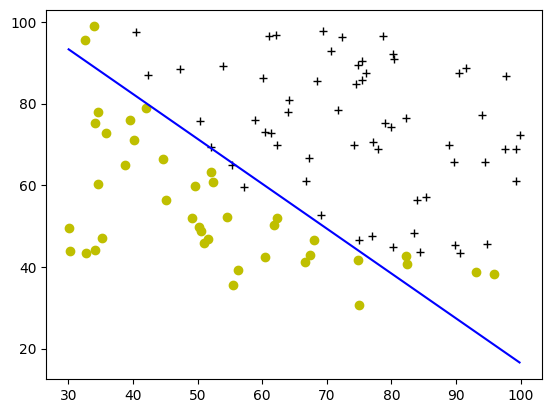

In [81]:
plot_decision_boundary(w, b, X_train, y_train)

# Задача 2

У цьому завданні я вам даю дані про погоду, вам треба передбачати чи буде в цей день дощ чи ні. Усі дані числового формату без пропущених значень. 

Ваше завдання наступне:
1) Завантажте дані, розбийте їх на тестовий та тренувальний сет у співвідношені 80:20 (можна скористуватися функцією [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

2) Натренуйте логістичну регресію на даних.

3) Виведіть accuracy

4) В класифікаторів є метод predicti_proba який передбачає ймовірності. Передбачте ці ймовірності для тестових даних та найдіть найкраще значення для accuracy на тестовому наборі даних

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
train_data = pd.read_csv('weatherAUS_new.csv', index_col = 0)
X = train_data.drop(columns=['RainTomorrow'])
y = train_data['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test) 
model = LogisticRegression()

model.fit(X_train, y_train)
print(metrics.accuracy_score(y_train, model.predict(X_train)))
print(metrics.accuracy_score(y_test, model.predict(X_test)))
print(model.predict_proba(X_train))
# train_data.info()

0.8366826661040491
0.8352614367593797
[[0.37822284 0.62177716]
 [0.70147585 0.29852415]
 [0.8159483  0.1840517 ]
 ...
 [0.97623414 0.02376586]
 [0.56798505 0.43201495]
 [0.95026555 0.04973445]]


C:\Users\Dyzalt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
